In [2]:
import pandas as pd
import numpy as np
training_descriptors = pd.read_csv("data/training_descriptors.csv", nrows=500)
# nrows=10 => 10s, nrows=100 => 40s, nrows=500 => 3 min

In [3]:
training_descriptors

,sample,FJ478961.1.1449,JF706678.1.1492,JQ919464.1.1367,AB915933.1.1450,JQ825201.1.1480,KJ145789.1.1365,JN023493.1.1478,GQ500796.1.1445,EF019723.1.1331,...,EF516737.1.1433,KJ631121.1.1419,EU133278.1.1316,GU983314.1.1407,LN562424.1.1323,EF018759.1.1407,JN023503.1.1511,EF492970.1.1449,JF226115.1.1303,EF516594.1.1486
0,training_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,training_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,training_2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,training_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,training_4,1,0,0,0,0,0,0,0,61,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,training_495,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,training_496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,training_497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,training_498,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
training_descriptors.shape

(500, 121695)

In [5]:
np.nonzero(training_descriptors[training_descriptors['sample'] == 'training_23'].to_numpy()[0][1:])[0].shape

(7160,)

### Feature selection

In [6]:
training_descriptors.drop(['sample'], axis=1)

,FJ478961.1.1449,JF706678.1.1492,JQ919464.1.1367,AB915933.1.1450,JQ825201.1.1480,KJ145789.1.1365,JN023493.1.1478,GQ500796.1.1445,EF019723.1.1331,EU440685.1.1413,...,EF516737.1.1433,KJ631121.1.1419,EU133278.1.1316,GU983314.1.1407,LN562424.1.1323,EF018759.1.1407,JN023503.1.1511,EF492970.1.1449,JF226115.1.1303,EF516594.1.1486
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,61,222,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1))
out = sel.fit_transform(training_descriptors.drop(['sample'], axis=1))

In [8]:
out.shape

(500, 45665)

In [9]:
training_descriptors_witout_sample = training_descriptors.drop(['sample'], axis=1)

In [10]:
keys = training_descriptors.keys().to_numpy()[1:]

### Some information about labels

In [11]:
y = pd.read_csv("data/training_environments.csv", nrows=500)

In [12]:
y

,Unnamed: 0,empo_1,empo_2,empo_3
0,training_0,Free-living,Non-saline,Water (non-saline)
1,training_1,Free-living,Non-saline,Water (non-saline)
2,training_2,Free-living,Non-saline,Soil (non-saline)
3,training_3,Free-living,Saline,Sediment (saline)
4,training_4,Free-living,Non-saline,Soil (non-saline)
...,...,...,...,...
495,training_495,Free-living,Saline,Sediment (saline)
496,training_496,Host-associated,Animal,Animal surface
497,training_497,Host-associated,Animal,Animal distal gut
498,training_498,Host-associated,Animal,Animal distal gut


In [13]:
y.iloc[:, -1]

0         Water (non-saline)
1         Water (non-saline)
2          Soil (non-saline)
3          Sediment (saline)
4          Soil (non-saline)
               ...          
495        Sediment (saline)
496           Animal surface
497        Animal distal gut
498        Animal distal gut
499    Sediment (non-saline)
Name: empo_3, Length: 500, dtype: object

In [43]:
number_of_features_to_leave = 1000
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=number_of_features_to_leave)
X_new = selector.fit(training_descriptors_witout_sample, y.iloc[:, -1])

In [44]:
cols = selector.get_support(indices=True)

In [49]:
cols

array([   335,    347,    386,    425,    440,    561,    583,    603,
          738,    812,    886,    911,   1016,   1081,   1091,   1109,
         1132,   1166,   1277,   1428,   1437,   1506,   1519,   1556,
         1876,   1994,   2028,   2048,   2066,   2086,   2101,   2256,
         2271,   2292,   2369,   2433,   2474,   2686,   2715,   2846,
         2883,   2956,   2998,   3056,   3095,   3201,   3275,   3329,
         3409,   3426,   3438,   3489,   3646,   3650,   3665,   3852,
         3924,   3939,   4058,   4065,   4140,   4167,   4192,   4194,
         4232,   4258,   4272,   4305,   4345,   4361,   4372,   4478,
         4495,   4616,   4625,   4638,   4826,   4941,   4954,   5026,
         5033,   5099,   5199,   5256,   5266,   5301,   5329,   5373,
         5430,   5640,   5658,   5666,   5773,   5876,   5929,   5947,
         5964,   5983,   6003,   6141,   6146,   6225,   6274,   6627,
         6804,   6844,   6914,   7001,   7133,   7145,   7159,   7177,
      

In [53]:
selceted_features_names = training_descriptors_witout_sample.keys()[cols]

In [54]:
training_descriptors.iloc[:,np.append(0, cols)]

,sample,JX861508.1.1541,CU919852.1.1355,JQ428169.1.1494,FJ217200.1.1450,HM270426.1.1354,GQ284356.1.1493,KJ192022.1.1521,HM773508.1.1259,HQ120303.1.1462,...,JQ337316.1.1421,JN713552.1.1493,KC009984.1.1493,GU227171.1.1453,FJ667971.1.1477,KF094603.1.1341,FJ679532.1.1411,AY953153.1.1344,JN494601.1.1392,AF018193.1.1484
0,training_0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,training_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,training_2,0,0,0,0,0,0,44,0,0,...,0,0,0,0,0,0,0,0,0,0
3,training_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,training_4,0,0,0,0,0,0,233,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,training_495,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,training_496,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
497,training_497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,training_498,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Correlation matrix: 1000 first features

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

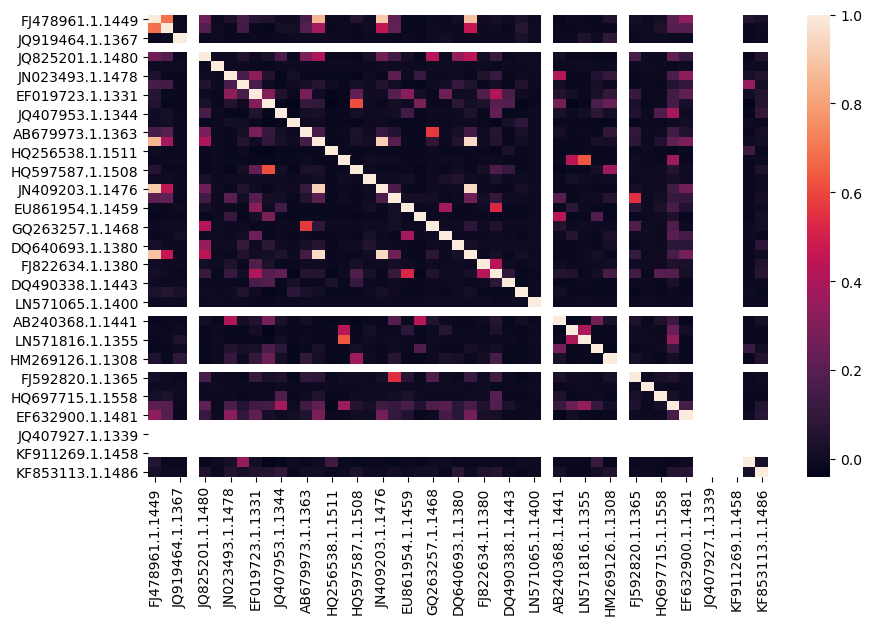

In [20]:
correlation_matrix = training_descriptors.iloc[:, :50].corr()

plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix)

White lines corresponds to zero features

-----------------------------------------------

### Data Set convert to usuable format

In [100]:
nrows = 15000
train_pd = pd.read_csv('data/training_descriptors.csv', nrows=nrows, usecols=selceted_features_names)

In [101]:
train_pd.to_numpy()

array([[ 22,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  7,  48,  54, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [ 15,  35, 195, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

### Convert labels to usuable format

In [102]:
labels_path = 'data/training_environments.csv'
labels = pd.read_csv(labels_path, nrows=nrows)
labels = labels.iloc[:, -1].to_numpy()

Encode labels

In [103]:
unique_labels = np.unique(labels)
value_to_int = {val: i for i, val in enumerate(unique_labels)}

# Use the dictionary to map each value in the array to an integer
encoded_labels = np.array([value_to_int[val] for val in labels])

In [104]:
value_to_int

{'Aerosol (non-saline)': 0,
 'Animal corpus': 1,
 'Animal distal gut': 2,
 'Animal proximal gut': 3,
 'Animal secretion': 4,
 'Animal surface': 5,
 'Hypersaline (saline)': 6,
 'Plant corpus': 7,
 'Plant rhizosphere': 8,
 'Plant surface': 9,
 'Sediment (non-saline)': 10,
 'Sediment (saline)': 11,
 'Soil (non-saline)': 12,
 'Surface (non-saline)': 13,
 'Surface (saline)': 14,
 'Water (non-saline)': 15,
 'Water (saline)': 16}

In [105]:
from sklearn import linear_model
reg = linear_model.RidgeClassifier()
values = train_pd.to_numpy()
reg.fit(values, encoded_labels)

RidgeClassifier()

In [106]:
reg.predict(values)

array([15,  2, 12, ...,  2, 12, 16])

### Test on train data

In [107]:
from sklearn.metrics import r2_score, precision_score

# Make predictions on the train data
predictions = reg.predict(values)

# Compute the R-squared value
r_squared = r2_score(encoded_labels, predictions)
print("R-squared value:", r_squared)

precision = precision_score(encoded_labels, predictions, average='micro')
print("precision:", precision)

R-squared value: 0.7682430788369685
precision: 0.886


## TEST

In [108]:
test_nrows = 2000 # 10%
test_pd = pd.read_csv('data/training_descriptors.csv', 
                    nrows=test_nrows, usecols=selceted_features_names,
                    skiprows=range(1, nrows + 1))

test_labels = pd.read_csv(labels_path, nrows=test_nrows, 
                        skiprows=range(1, nrows + 1))

test_labels = test_labels.iloc[:, -1].to_numpy()

# Use the dictionary to map each value in the array to an integer
test_encoded_labels = np.array([value_to_int[val] for val in test_labels])

In [109]:
test_predictions = reg.predict(test_pd.to_numpy())

# Compute the R-squared value
r_squared = r2_score(test_encoded_labels, test_predictions)
print("R-squared value:", r_squared)

precision = precision_score(test_encoded_labels, test_predictions, average='micro')
print("precision:", precision)

R-squared value: 0.7089793715240043
precision: 0.863


## Another classifier (SGD)

### Fit

In [110]:
from sklearn import linear_model
reg = linear_model.SGDClassifier()
values = train_pd.to_numpy()
reg.fit(values, encoded_labels)

SGDClassifier()

### Test on train data

In [111]:
# Make predictions on the train data
predictions = reg.predict(values)

# Compute the R-squared value
r_squared = r2_score(encoded_labels, predictions)
print("R-squared value:", r_squared)

precision = precision_score(encoded_labels, predictions, average='micro')
print("precision:", precision)

R-squared value: 0.7771214322043041
precision: 0.8478


### TEST

In [112]:
test_predictions = reg.predict(test_pd.to_numpy())

# Compute the R-squared value
r_squared = r2_score(test_encoded_labels, test_predictions)
print("R-squared value:", r_squared)

precision = precision_score(test_encoded_labels, test_predictions, average='micro')
print("precision:", precision)

R-squared value: 0.7483805871875837
precision: 0.827
